## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import  r2_score

## Read Data

In [2]:
df = pd.read_csv("../input/gold-price-data/gld_price_data.csv")
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
df.isna().any()

Date       False
SPX        False
GLD        False
USO        False
SLV        False
EUR/USD    False
dtype: bool

In [5]:
df.shape

(2290, 6)

## Data Visualization

In [6]:
df.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
corr = df.corr(method='pearson')

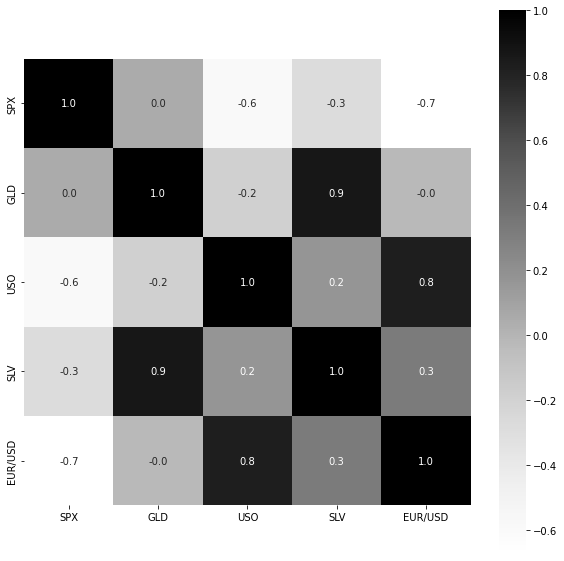

In [8]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':10}, cmap='Greys');

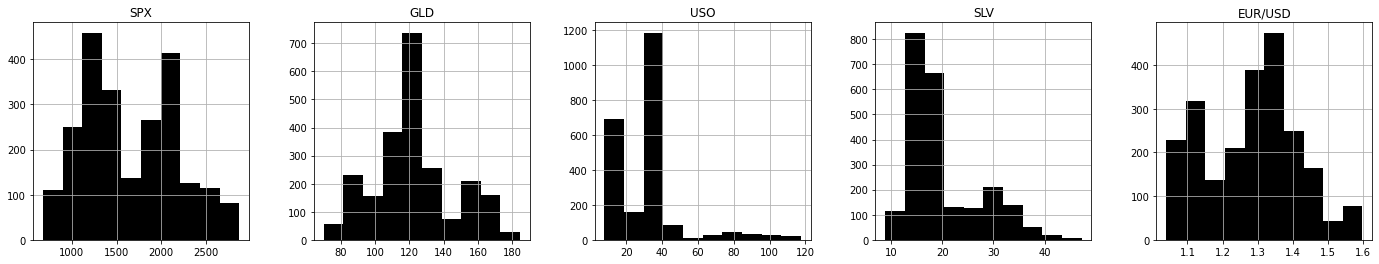

In [9]:
df.hist(figsize=(24,4), layout=(1,5), color="black");

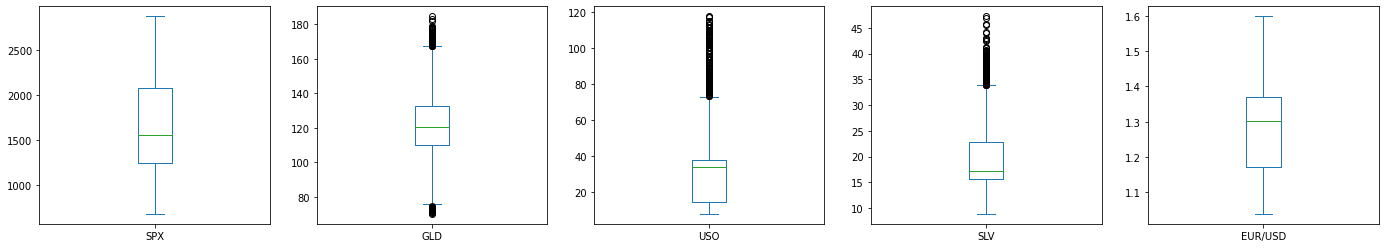

In [10]:
df.plot(kind="box", subplots=True, layout=(1,5), figsize=(24,4),sharex=False, sharey=False);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

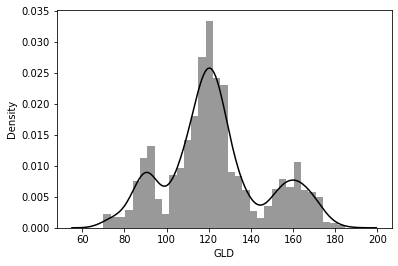

In [11]:
sns.distplot(df['GLD'], color='black')

## Split Data(train-test-validation)

In [12]:
X=df.drop(['Date','GLD'],axis=1)
y=df['GLD']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, 
    y_train, 
    test_size=0.2, 
    shuffle=True,
    random_state=2,
)

## Creat Random Forest model

In [15]:
model1=RandomForestRegressor(n_estimators=100)
model1.fit(X_train,y_train)

RandomForestRegressor()

## Evaluat and Visualize Random Forest prediction

In [16]:
train_prediction_rf=model1.predict(X_train)
print("Training score : ",r2_score(y_train,train_prediction_rf))

Training score :  0.9983521631678973


In [17]:
val_prediction_rf=model1.predict(X_val)
print("val score : ",r2_score(y_val,val_prediction_rf))

val score :  0.9878009167076871


In [18]:
test_prediction_rf=model1.predict(X_test)
RF_score = r2_score(y_test,test_prediction_rf)
print("Testing score : ",r2_score(y_test,test_prediction_rf))


Testing score :  0.9847749228302343


In [19]:
print(test_prediction_rf[:10])

[168.59779975  82.04279983 116.61629972 127.37960097 120.76070147
 154.58139974 150.48869964 126.32740032 117.72529876 125.83890082]


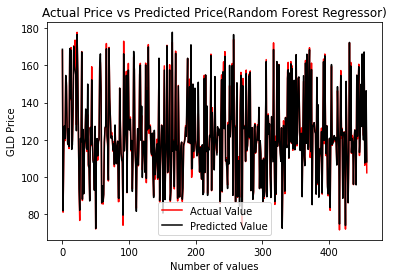

In [20]:
plt.plot(list(y_test), color='red', label = 'Actual Value')
plt.plot(test_prediction_rf, color='black', label='Predicted Value')
plt.title('Actual Price vs Predicted Price(Random Forest Regressor)')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

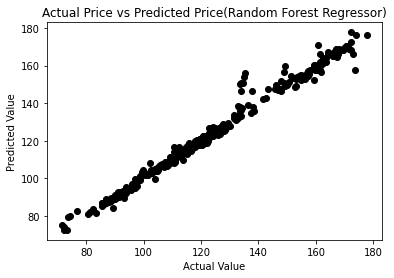

In [21]:
predictions = model1.predict(X_test)
plt.scatter(y_test,test_prediction_rf,color='black')
plt.title('Actual Price vs Predicted Price(Random Forest Regressor)')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value');

## Creat Decision Tree model

In [22]:
model2 = DecisionTreeRegressor()
model2.fit(X_train,y_train)

DecisionTreeRegressor()

## Evaluat and Visualize Decision Tree prediction

In [23]:
train_prediction_dt=model2.predict(X_train)
print("Training score : ",r2_score(y_train,train_prediction_dt))

Training score :  1.0


In [24]:
val_prediction_dt=model2.predict(X_val)
print("val score : ",r2_score(y_val,val_prediction_dt))

val score :  0.9846637114186787


In [25]:
test_prediction_dt=model2.predict(X_test)
dt_score = r2_score(y_test,test_prediction_dt)
print("Testing score : ",r2_score(y_test,test_prediction_dt))

Testing score :  0.9730469306660342


In [26]:
print(test_prediction_dt[:10])

[168.5       86.089996 114.769997 127.550003 119.620003 155.669998
 150.759995 126.559998 116.029999 125.620003]


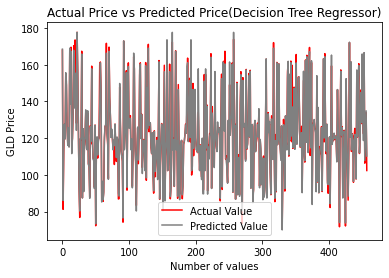

In [27]:
plt.plot(list(y_test), color='red', label = 'Actual Value')
plt.plot(test_prediction_dt, color='gray', label='Predicted Value')
plt.title('Actual Price vs Predicted Price(Decision Tree Regressor)')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

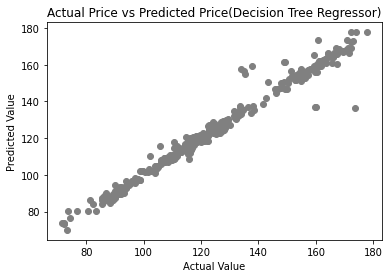

In [28]:
predictions = model1.predict(X_test)
plt.scatter(y_test,test_prediction_dt,color='gray')
plt.title('Actual Price vs Predicted Price(Decision Tree Regressor)')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value');

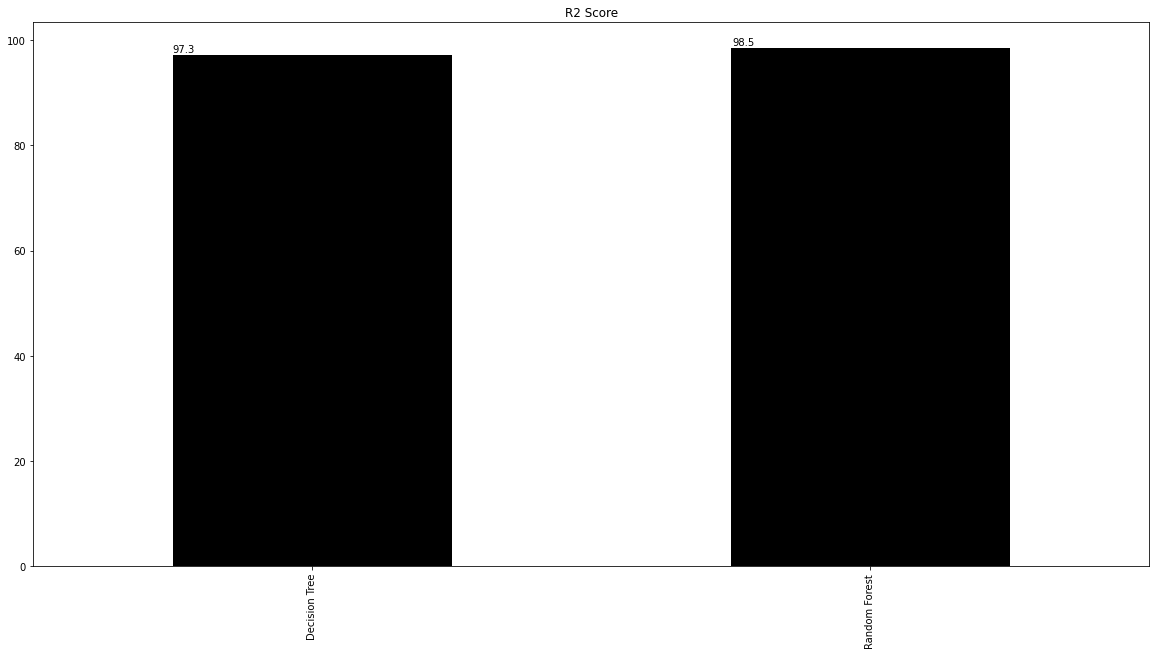

In [29]:
metric_test = {
    "R2 score": {
   
    "Decision Tree": dt_score*100,
    "Random Forest": RF_score*100

    }
}

ax = pd.DataFrame(metric_test).plot(kind="bar", 
                             figsize = (20,10), 
                             legend =False, 
                             title = "R2 Score",
                             color = '#000000');
                    
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 1)), (p.get_x() * 1.005, p.get_height() * 1.005))